# **Clasificación de caballos**  
## REDES NEURONALES CONVOLUCIONALES  

Por: David Santiago Guerrero Martinez  davids.guerrero@udea.edu.co (1)  
     Estudiante de ingeniería electrónica UdeA  
     CC 1085319765 (1)  

Curso Básico de Procesamiento de Imágenes y Visión Artificial  
22 de MAYO de 2023  

En el ejemplo se utiliza una CNN en python para clasificar imágenes en tres grupos: Caballo Akhal-Teke, Appaloosa y Arabian. Siendo esta entrenada con un dataset de 225 imágenes de entrenamiento y 90 de validación.

### IMPORTAR LAS LIBRERIAS NECESARIAS

In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
import sklearn.metrics
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.models import load_model

# Conjunto de entrenamiento 

Inicialmente se extrae de cada carpeta las imágenes de Caballo Akhal-Teke, Appaloosa y Arabian y se les aplica el comando `reshape` para que todas las imágenes tengan el mismo tamaño a color, el dataset que aqui se implementa es una modificación del dataset Horse Breeds disponible en https://www.kaggle.com/olgabelitskaya/horse-breeds


Akhal-Teke

In [32]:
# Se localizan las imagenes en la ruta y se crea una lista con todas las imágenes disponibles en la carpeta
ruta_Akhal_Teke = "C:/Users/david/Documents/Universidad/PDI_II/3erTrabajo/Images/Akhal-Teke-Train"
Akhal_Teke = []
img_size = 256

for img in os.listdir(ruta_Akhal_Teke):
    img = cv2.imread(os.path.join(ruta_Akhal_Teke,img))
    img_resize = cv2.resize(img,(img_size,img_size))
    Akhal_Teke.append([img_resize])

print(len(Akhal_Teke))

75


In [33]:
#Se convierte la lista en arreglo y se usa resheape para establecer el tamaño y la profundidad
Akhal_Teke = np.array(Akhal_Teke)
Akhal_Teke = np.reshape(Akhal_Teke,(len(Akhal_Teke),256,256,3))
print(Akhal_Teke.shape)

(75, 256, 256, 3)


(256, 256, 3)


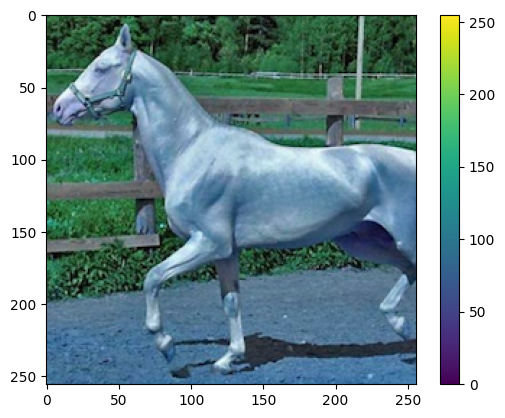

In [34]:
#Se verifica que se creó correctamente el arreglo de numpy y se imprime una imagen de prueba
print(Akhal_Teke[4].shape)
plt.figure()
plt.imshow(np.squeeze(Akhal_Teke[4]))
plt.colorbar()
plt.grid(False)
plt.show()

Appaloosa 

Se realiza el mismo procedimiento descrito anteriormente para crear un arreglo con el nombre correspondiente a la carpeta de imágenes que se esta analizando

In [35]:
ruta_Appaloosa = "C:/Users/david/Documents/Universidad/PDI_II/3erTrabajo/Images/Appaloosa-Train"
Appaloosa = []
img_size = 256

for img in os.listdir(ruta_Appaloosa):
  img = cv2.imread(os.path.join(ruta_Appaloosa,img))
  img_resize = cv2.resize(img,(img_size,img_size))
  Appaloosa.append([img_resize])

print(len(Appaloosa))

75


In [36]:
Appaloosa = np.array(Appaloosa)
Appaloosa = np.reshape(Appaloosa,(len(Appaloosa),256,256,3))
print(Appaloosa.shape)

(75, 256, 256, 3)


(256, 256, 3)


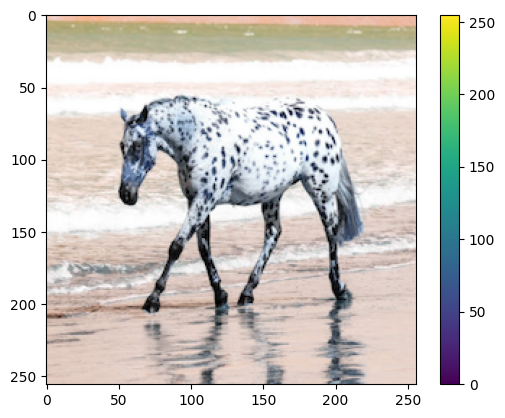

In [37]:
print(Appaloosa[4].shape)
plt.figure()
plt.imshow(np.squeeze(Appaloosa[4]))
plt.colorbar()
plt.grid(False)
plt.show()

Arabian

Se realiza el mismo procedimiento descrito anteriormente para crear un arreglo con el nombre correspondiente a la carpeta de imágenes que se esta analizando

In [38]:
ruta_Arabian = "C:/Users/david/Documents/Universidad/PDI_II/3erTrabajo/Images/Arabian-Train"
Arabian = []
img_size = 256

for img in os.listdir(ruta_Arabian):
  img = cv2.imread(os.path.join(ruta_Arabian,img))
  img_resize = cv2.resize(img,(img_size,img_size))
  Arabian.append([img_resize])

print(len(Arabian))

75


In [39]:
Arabian = np.array(Arabian)
Arabian = np.reshape(Arabian,(len(Arabian),256,256,3))
print(Arabian.shape)

(75, 256, 256, 3)


(256, 256, 3)


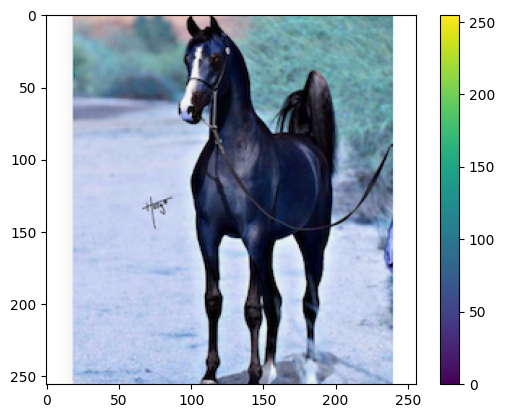

In [40]:
print(Arabian[4].shape)
plt.figure() 
plt.imshow(np.squeeze(Arabian[6]))
plt.colorbar()
plt.grid(False)
plt.show()

Se deben pre-procesar las imágenes haciendo que los pixeles se encuentren en un valor entre 0 y 1 (normalizar los valores), además se crea un arreglo con todas las imágenes de entrenamiento llamado Imagenes

In [41]:
#Se genera mediante numpy la concatenación de los arreglos individuales creados anteriormente que contienen las imagenes de cada etiqueta para entrenar
imagenes = np.concatenate([Akhal_Teke,Appaloosa,Arabian])
print(len(imagenes))
Imagenes = np.array(imagenes)
Imagenes = Imagenes / 255
print(Imagenes.shape)

225
(225, 256, 256, 3)


#### Asignación de etiquetas
Cada elemento de la lista debe tener una etiqueta a la que diga a la categoría que pertenece

In [42]:
#Se genera una lista para cada etiqueta con un numero repetido dependiendo de la cantidad de imágenes en el directorio
etiquetas_Akhal_Teke = np.repeat(0,len(Akhal_Teke))
print(len(etiquetas_Akhal_Teke))
print(etiquetas_Akhal_Teke)

etiquetas_Appaloosa = np.repeat(1,len(Appaloosa))
print(len(etiquetas_Appaloosa))
print(etiquetas_Appaloosa)

etiquetas_Arabian = np.repeat(2,len(Arabian))
print(len(etiquetas_Arabian))
print(etiquetas_Arabian)

75
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
75
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
75
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [43]:
# Nombres de las clases
class_nombres = ['Akhal_Teke','Appaloosa','Arabian']

In [44]:
# Se concatenan las etiquetas creadas anteriormente para que se encuentren
# en una sola lista
labels = np.concatenate([etiquetas_Akhal_Teke,etiquetas_Appaloosa,etiquetas_Arabian])
print(len(labels))
print(labels)
Labels = np.array(labels)
print(Labels.shape)

225
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]
(225,)


Se muestran las imágenes del dataset con sus respectivas etiquetas 

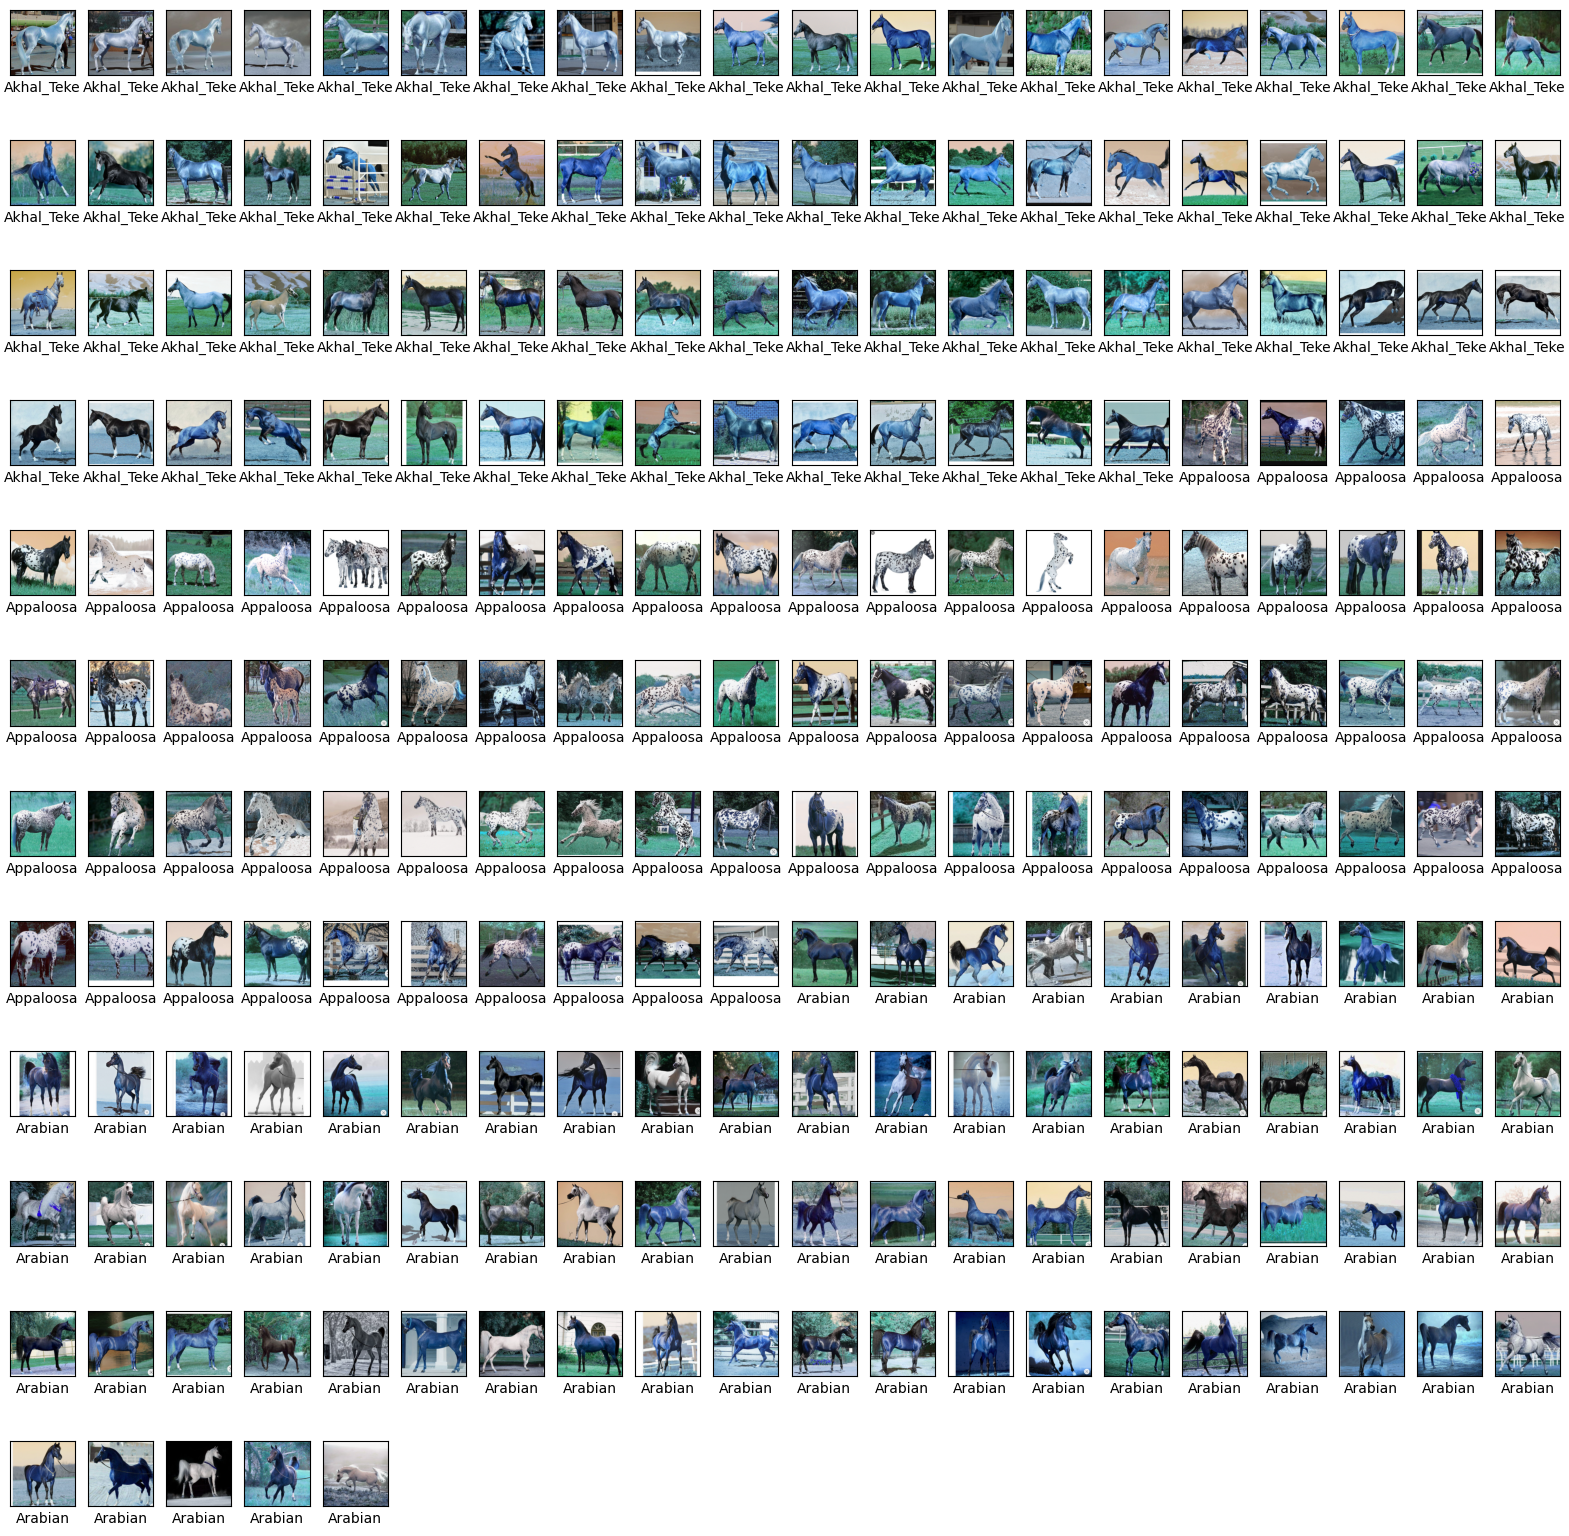

In [45]:
#Mediante matplotlib se muestran todas las imágenes del directorio de entrenamiento junto con su respectiva etiqueta
plt.figure(figsize=(20,20))
for i in range(len(labels)):
    plt.subplot(12,20,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Imagenes[i])
    plt.xlabel(class_nombres[Labels[i]])
plt.show()

Convertir las etiquetas a variables categóricas

In [46]:
# Se convierten las etiquetas en variables categoricas mediante la función to_categorical
# Se crean las variables estándares para el conjunto de entrenamiento tanto las imágenes como los labels
x_train = Imagenes
y_train = Labels
y_train = to_categorical(Labels,num_classes = 3)
print(y_train[0])
print(y_train.shape)

[1. 0. 0.]
(225, 3)


# Test
A continuación, se realiza el mismo procedimiento anterior para el conjunto de test, es decir revisar cada carpeta y generar un arreglo concatenando los arreglos individuales de las imágenes por categoría así como tambien se crean variables estándar y se generan los labels del mismo modo como se realizó para el conjunto de entrenamiento

Akhal-Teke

In [47]:
ruta_Akhal_Teke2 = "C:/Users/david/Documents/Universidad/PDI_II/3erTrabajo/Images/Akhal-Teke-Test"
Akhal_Teke2 = []
img_size = 256

for img in os.listdir(ruta_Akhal_Teke2):
    img = cv2.imread(os.path.join(ruta_Akhal_Teke2,img))
    img_resize = cv2.resize(img,(img_size,img_size))
    Akhal_Teke2.append([img_resize])

Akhal_Teke2 = np.array(Akhal_Teke2)
Akhal_Teke2 = np.reshape(Akhal_Teke2,(len(Akhal_Teke2),256,256,3))

Appaloosa

In [48]:
ruta_Appaloosa2 = "C:/Users/david/Documents/Universidad/PDI_II/3erTrabajo/Images/Appaloosa-Test"
Appaloosa2 = []
img_size = 256

for img in os.listdir(ruta_Appaloosa2):
    img = cv2.imread(os.path.join(ruta_Appaloosa2,img))
    img_resize = cv2.resize(img,(img_size,img_size))
    Appaloosa2.append([img_resize])

Appaloosa2 = np.array(Appaloosa2)
Appaloosa2 = np.reshape(Appaloosa2,(len(Appaloosa2),256,256,3))

Arabian

In [49]:
ruta_Arabian2 = "C:/Users/david/Documents/Universidad/PDI_II/3erTrabajo/Images/Arabian-Test"
Arabian2 = []
img_size = 256

for img in os.listdir(ruta_Arabian2):
    img = cv2.imread(os.path.join(ruta_Arabian2,img))
    img_resize = cv2.resize(img,(img_size,img_size))
    Arabian2.append([img_resize])

Arabian2 = np.array(Arabian2)
Arabian2 = np.reshape(Arabian2,(len(Arabian2),256,256,3))

Normalizar datos

In [50]:
imagenes_test = np.concatenate([Akhal_Teke2,Appaloosa2,Arabian2])
print(len(imagenes_test))
Imagenes_test = np.array(imagenes_test)
Imagenes_test = Imagenes_test / 255
print(Imagenes_test.shape)

90
(90, 256, 256, 3)


Asignar etiquetas

In [51]:
etiquetas_Akhal_Teke2 = np.repeat(0,len(Akhal_Teke2))
print(len(etiquetas_Akhal_Teke2))
print(etiquetas_Akhal_Teke2)

etiquetas_Appaloosa2 = np.repeat(1,len(Appaloosa2))
print(len(etiquetas_Appaloosa2))
print(etiquetas_Appaloosa2)

etiquetas_Arabian2 = np.repeat(2,len(Arabian2))
print(len(etiquetas_Arabian2))
print(etiquetas_Arabian2)

30
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
30
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
30
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [52]:
class_nombres = ['Akhal_Teke','Appaloosa','Arabian']

labels_test = np.concatenate([etiquetas_Akhal_Teke2,etiquetas_Appaloosa2,etiquetas_Arabian2])
print(len(labels_test))
print(labels_test)
Labels_test = np.array(labels_test)
print(Labels_test.shape)

90
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(90,)


In [53]:
x_test = Imagenes_test
y_test = Labels_test
y_test = to_categorical(Labels_test,num_classes = 3)
print(y_test[0])
print(y_test.shape)

[1. 0. 0.]
(90, 3)


# **Modelo**

Para la construcción del modelo se tomaron como base varios ejemplos de modelos probados para la clasificación de imágenes, así como tambien ejemplos disponibles en la página web de keras y tensorflow, sin embargo, el modelo final es el resultado  de modificaciones propias y adiciones de acuerdo a los resultados que se iban obteniendo en la ejecución y posterior verificación del mismo.

El modelo cuenta con tres capas convolucionales y dos capas de apilamiento antes de realizar el aplanamiento, posterior a este cuenta con dos capas dense con activación relu con 250 y 100 neuronas respectivamente y por ultimo una capa dense con 3 neuronas y activación softmax

Para el entrenamiento se utilizaron 25 epocas y un tamaño de 64 

In [54]:
longitud, altura = 256, 256

In [55]:
# Definición de parámetros para la construcción de la red

# Filtros para el preprocesamiento de las imagenes
filtrosConv1 = 32
filtrosConv2 = 64
tamano_filtro1 = (3, 3)
tamano_filtro2 = (2, 2)
tamano_pool = (2, 2)

#Numero de clases 
clases = 3

# Inicio de la red neuronal
# Capa convolucional y maxpooling

model = Sequential()
model.add(Convolution2D(filtrosConv1, tamano_filtro1, padding ="same", input_shape=(longitud, altura, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=tamano_pool))

model.add(Convolution2D(filtrosConv2, tamano_filtro2, padding ="same"))
model.add(Convolution2D(filtrosConv2, tamano_filtro2, padding ="same"))
model.add(MaxPooling2D(pool_size=tamano_pool))

model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(clases, activation='softmax'))

model.compile(optimizer='adam',
                loss='categorical_crossentropy',metrics=['accuracy','Precision'])
history = model.fit(x_train,y_train,epochs = 25,batch_size = 64, validation_data=(x_test,y_test))

Epoch 1/25
4/4 [==============================] - 8s 2s/step - loss: 16.9049 - accuracy: 0.3733 - precision: 0.3851 - val_loss: 7.0993 - val_accuracy: 0.3333 - val_precision: 0.3333
Epoch 2/25
4/4 [==============================] - 7s 2s/step - loss: 12.1682 - accuracy: 0.2978 - precision: 0.2991 - val_loss: 3.4843 - val_accuracy: 0.3333 - val_precision: 0.3333
Epoch 3/25
4/4 [==============================] - 7s 2s/step - loss: 4.1141 - accuracy: 0.3733 - precision: 0.3687 - val_loss: 1.4223 - val_accuracy: 0.3222 - val_precision: 0.3222
Epoch 4/25
4/4 [==============================] - 7s 2s/step - loss: 1.8504 - accuracy: 0.4133 - precision: 0.4233 - val_loss: 1.1784 - val_accuracy: 0.4889 - val_precision: 0.5059
Epoch 5/25
4/4 [==============================] - 7s 2s/step - loss: 1.2543 - accuracy: 0.4844 - precision: 0.4927 - val_loss: 0.9417 - val_accuracy: 0.5111 - val_precision: 0.5000
Epoch 6/25
4/4 [==============================] - 7s 2s/step - loss: 1.0989 - accuracy: 0.484

In [ ]:
# EJECUTAR SOLO PARA GUARDAR EL MODELO
target_dir = 'C:/Users/david/Documents/Universidad/PDI_II/3erTrabajo/modelo'
if not os.path.exists(target_dir):
    os.mkdir(target_dir)
model.save('C:/Users/david/Documents/Universidad/PDI_II/3erTrabajo/modelo/modelo.h5')

# MÉTRICAS Y GRÁFICOS

In [57]:
# Se muestra el resumen de la red donde se evidencian las capas aplicadas
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_5 (ModuleWra  (None, 256, 256, 32)     896       
 pper)                                                           
                                                                 
 module_wrapper_6 (ModuleWra  (None, 128, 128, 32)     0         
 pper)                                                           
                                                                 
 module_wrapper_7 (ModuleWra  (None, 128, 128, 64)     8256      
 pper)                                                           
                                                                 
 module_wrapper_8 (ModuleWra  (None, 128, 128, 64)     16448     
 pper)                                                           
                                                                 
 module_wrapper_9 (ModuleWra  (None, 64, 64, 64)      

In [58]:
# Se asignan las metricas tomadas en el entrenamiento del modelo
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])


In [59]:
# Se evalúa el modelo con las imágenes asignadas para el test con la finalidad de observar la precision y exactitud
val_loss, test_acc, test_precision = model.evaluate(x_test, y_test)

3/3 [==============================] - 1s 174ms/step - loss: 0.6478 - accuracy: 0.7111 - precision: 0.7273


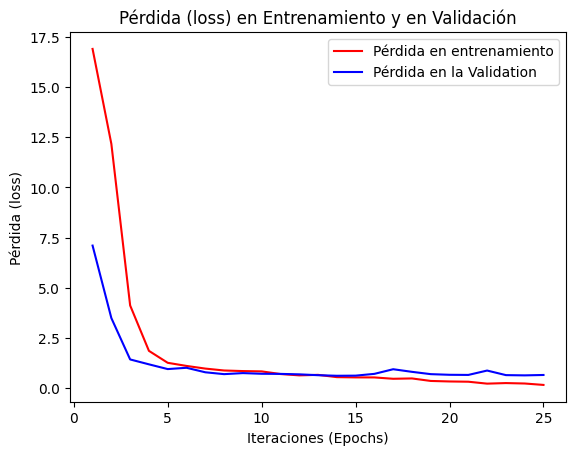

In [60]:
# Se muestra la gráfica de relación entre las pérdidas en el entrenamiento y en la validación
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'r', label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss_values, 'b', label='Pérdida en la Validation')
plt.title('Pérdida (loss) en Entrenamiento y en Validación')
plt.xlabel('Iteraciones (Epochs)')
plt.ylabel('Pérdida (loss)')
plt.legend()
plt.show()

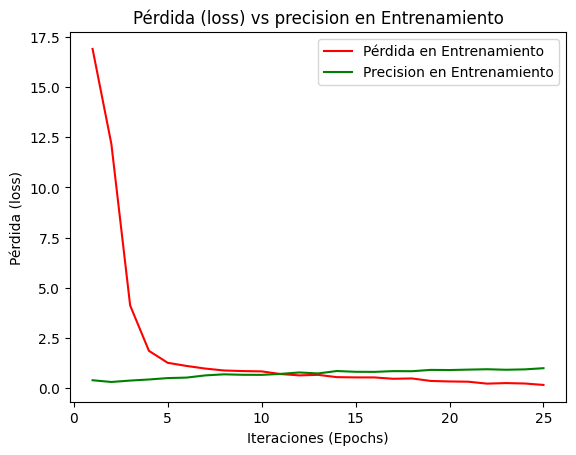

In [61]:
# Se muestra la gráfica de relación entre la precision en el entrenamiento y la pérdida en el entrenamiento
loss_values = history_dict['loss']
precision = history_dict['precision']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'r', label='Pérdida en Entrenamiento')
plt.plot(epochs, precision, 'g', label='Precision en Entrenamiento')
plt.title('Pérdida (loss) vs precision en Entrenamiento')
plt.xlabel('Iteraciones (Epochs)')
plt.ylabel('Pérdida (loss)')
plt.legend()
plt.show()


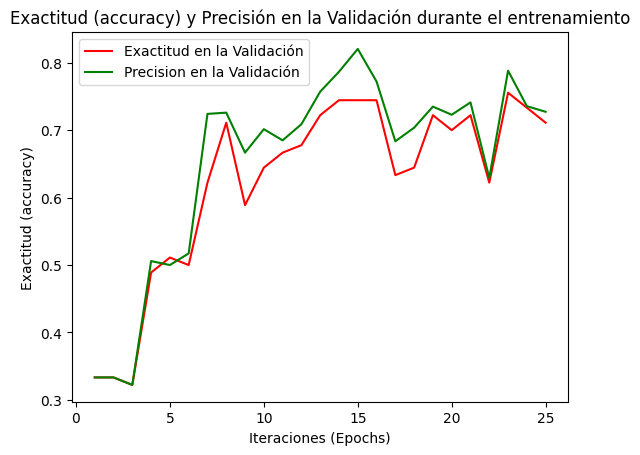

In [62]:
#Se muestra la gráfica de la exactitud y la precisión en la validación durante el entrenamiento
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
val_precision = history_dict['val_precision']
plt.plot(epochs, val_acc, 'r', label='Exactitud en la Validación')
plt.plot(epochs, val_precision, 'g', label='Precision en la Validación')
plt.title('Exactitud (accuracy) y Precisión en la Validación durante el entrenamiento')
plt.xlabel('Iteraciones (Epochs)')
plt.ylabel('Exactitud (accuracy)')
plt.legend()
plt.show()

In [63]:
# Muestra el test de exactitud del modelo con respecto a la evaluación
print('Test accuracy:', test_acc)

Test accuracy: 0.7111111283302307


In [64]:
# Se muestra la comparación de la predicción y los labels reales para 20 datos
predictions = model.predict(x_test)
pruebas = range(60)
print("predicciones:")
for i in pruebas:
    print(np.argmax(predictions[i]))
print("valores reales:")
for i in pruebas:
    print(np.argmax(y_test[i]))

3/3 [==============================] - 1s 190ms/step
predicciones:
0
0
1
0
0
0
0
1
0
0
0
0
0
2
1
1
0
0
0
1
0
0
0
0
2
0
0
0
2
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
0
0
1
1
1
1
1
1
1
1
1
valores reales:
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [65]:
decoded_y_test = y_test.argmax(axis=1)
decoded_predictions = predictions.argmax(axis=1)

# Cálculo del reporte de clasificación
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_test,
                            decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.72      0.87      0.79        30
           2       0.74      0.57      0.64        30

    accuracy                           0.71        90
   macro avg       0.71      0.71      0.71        90
weighted avg       0.71      0.71      0.71        90



In [66]:
# Cálculo de F1
print(f'F1-micro: {f1_score(decoded_y_test, decoded_predictions, average="micro")}')
print(f'F1-macro: {f1_score(decoded_y_test, decoded_predictions, average="macro")}')
print(f'F1-weighted: {f1_score(decoded_y_test, decoded_predictions, average="weighted")}')

print(f'F1 por clase:')
print('----')
f1_score_per_class = f1_score(decoded_y_test, decoded_predictions, average=None)
for label, score in zip(range(10), f1_score_per_class):
    print(f'\t - F1 para la clase {label}: {score}')
print('----')

F1-micro: 0.7111111111111111
F1-macro: 0.7059709373349953
F1-weighted: 0.7059709373349954
F1 por clase:
----
	 - F1 para la clase 0: 0.6885245901639343
	 - F1 para la clase 1: 0.7878787878787877
	 - F1 para la clase 2: 0.6415094339622641
----


In [67]:
# Cálculo de precision
print(f'Precision (micro): {precision_score(decoded_y_test, decoded_predictions, average="micro")}')
print(f'Precision (macro): {precision_score(decoded_y_test, decoded_predictions, average="macro")}')
print(f'Precision (weighted): {precision_score(decoded_y_test, decoded_predictions, average="weighted")}')

print(f'Precision por clase:')
print('----')
precision_score_per_class = precision_score(decoded_y_test, decoded_predictions, average=None)
for label, score in zip(range(10), precision_score_per_class):
    print(f'\t - Precision para la clase {label}: {score}')
print('----')

Precision (micro): 0.7111111111111111
Precision (macro): 0.7129240039478469
Precision (weighted): 0.7129240039478468
Precision por clase:
----
	 - Precision para la clase 0: 0.6774193548387096
	 - Precision para la clase 1: 0.7222222222222222
	 - Precision para la clase 2: 0.7391304347826086
----


In [68]:
# Cálculo de recall
print(f'Recall (micro): {recall_score(decoded_y_test, decoded_predictions, average="micro")}')
print(f'Recall (macro): {recall_score(decoded_y_test, decoded_predictions, average="macro")}')
print(f'Recall (weighted): {recall_score(decoded_y_test, decoded_predictions, average="weighted")}')

print(f'Recall por clase:')
print('----')
recall_score_per_class = recall_score(decoded_y_test, decoded_predictions, average=None)
for label, score in zip(range(3), recall_score_per_class):
    print(f'\t - Recall para la clase {label}: {score}')
print('----')

Recall (micro): 0.7111111111111111
Recall (macro): 0.7111111111111111
Recall (weighted): 0.7111111111111111
Recall por clase:
----
	 - Recall para la clase 0: 0.7
	 - Recall para la clase 1: 0.8666666666666667
	 - Recall para la clase 2: 0.5666666666666667
----


In [69]:
# Cálculo de accuracy
print(f'Exactitud (accuracy): {accuracy_score(decoded_y_test, decoded_predictions)}')

Exactitud (accuracy): 0.7111111111111111


In [70]:
# Calculo de la matriz de confusión
matrix = tf.math.confusion_matrix(decoded_y_test, decoded_predictions, num_classes=3, weights=None, dtype=tf.dtypes.int32, name=None)
print(matrix)

tf.Tensor(
[[21  5  4]
 [ 2 26  2]
 [ 8  5 17]], shape=(3, 3), dtype=int32)


# Predicción Futura

Se hace uso de un proceso similar al empleado para generar la data de entrenamiento y validación, las imágenes que se testean son desconocidas para la red puesto que no se encuentran en el set de entrenamiento o validación, se implementa una de cada tipo para verificar el cumplimiento.

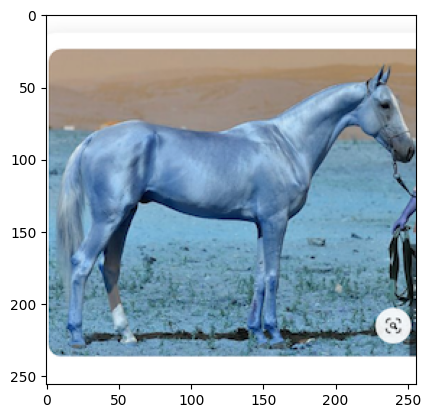

(1, 256, 256, 3)
1/1 [==============================] - 0s 71ms/step
[[1. 0. 0.]]
Posición:  0
Tipo de Caballo:  Akhal_Teke


In [77]:
img = cv2.imread("C:/Users/david/Documents/Universidad/PDI_II/3erTrabajo/Images/Akhal-Teke-Test/01_082.png")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(img_size,img_size))
img = (np.expand_dims(img,0))
print(img.shape)

prediccion = model.predict(img)
print(prediccion)
print('Posición: ' ,np.argmax(prediccion))
print('Tipo de Caballo: ' ,class_nombres[np.argmax(prediccion)])

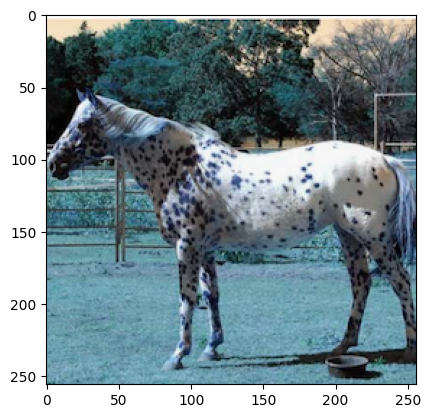

(1, 256, 256, 3)
1/1 [==============================] - 0s 54ms/step
[[0. 1. 0.]]
Posición:  1
Tipo de Caballo:  Appaloosa


In [79]:
img = cv2.imread("C:/Users/david/Documents/Universidad/PDI_II/3erTrabajo/Images/Appaloosa-Test/02_100.png")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(img_size,img_size))
img = (np.expand_dims(img,0))
print(img.shape)

prediccion = model.predict(img)
print(prediccion)
print('Posición: ' ,np.argmax(prediccion))
print('Tipo de Caballo: ' ,class_nombres[np.argmax(prediccion)])

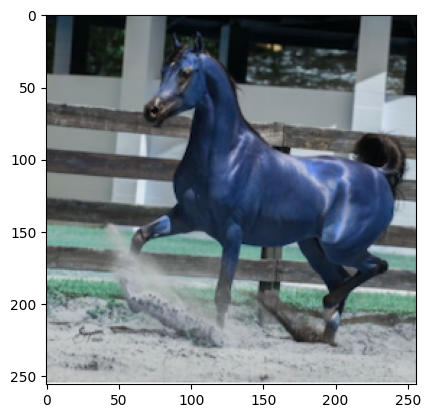

(1, 256, 256, 3)
1/1 [==============================] - 0s 61ms/step
[[1.8610902e-07 1.7401489e-14 9.9999976e-01]]
Posición:  2
Tipo de Caballo:  Arabian


In [81]:
img = cv2.imread("C:/Users/david/Documents/Universidad/PDI_II/3erTrabajo/Images/Arabian-Test/06_078.png")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(img_size,img_size))
img = (np.expand_dims(img,0))
print(img.shape)

prediccion = model.predict(img)
print(prediccion)
print('Posición: ' ,np.argmax(prediccion))
print('Tipo de Caballo: ' ,class_nombres[np.argmax(prediccion)])

# Conclusiones 

- El modelo que se logró establecer cumplió las espectativas en cuanto a la clasificación de las clases de imágenes con las que se entrenó a pesar de ser un dataset muy pequeño en comparación con los que se utilizan normalmente en este tipo de aplicaciones 

- El resultado obtenido en precisión y exactitud cercano a un 70% es un buen resultado para haber sido conseguido con un dataset pequeño y un tiempo de entrenamiento de cercano a los 3 minutos. 

- Aunque es preferible una curva de descenso de pérdida más suave, indicando que el modelo se entrena de forma similar en cada época, de igual manera se logra obtener un error pequeño sin necesidad de aumentar en el número de estas y evitar un sobre entrenamiento.